In [13]:
from __future__ import print_function
from datahandling import access_db
from data_processing_pipeline import equip_dtypes_for_scoring
from tinydb import Query, TinyDB
from matplotlib.pyplot import plot, figure, ylim, xlim
from model_analysis import translate_model_code
from numpy import argmax
from no_big_db_func import get_all_names
from pandas import DataFrame
% matplotlib inline

In [14]:
# top_top_db = TinyDB('test.json')

In [15]:
# top_top_db.purge()

In [16]:
names = get_all_names()

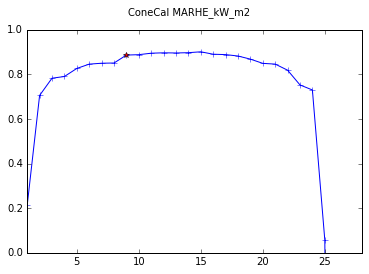

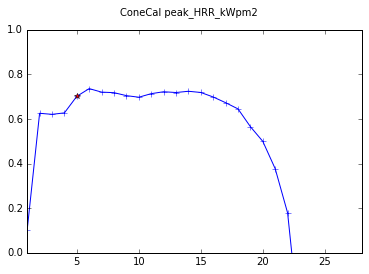

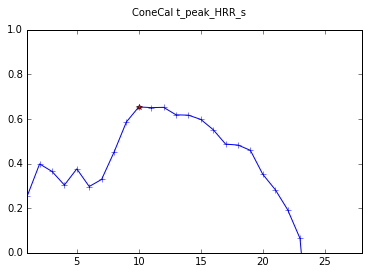

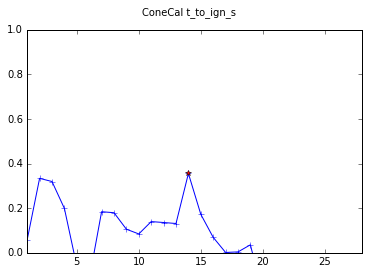

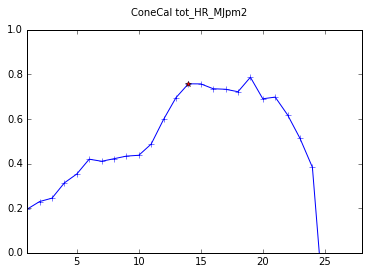

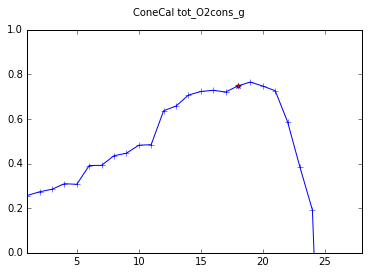

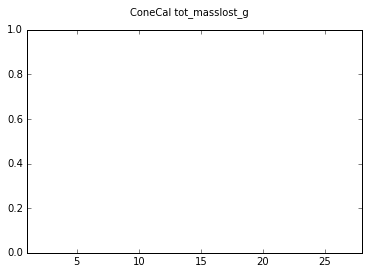

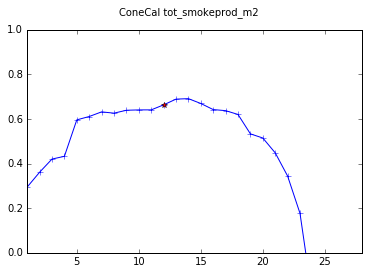

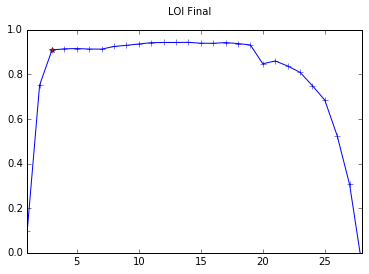

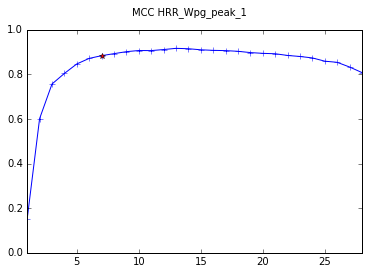

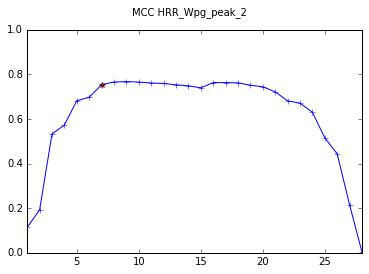

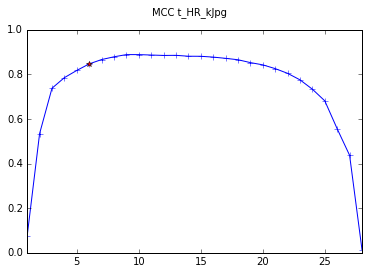

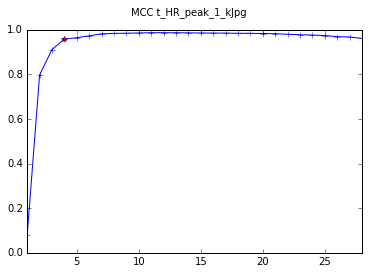

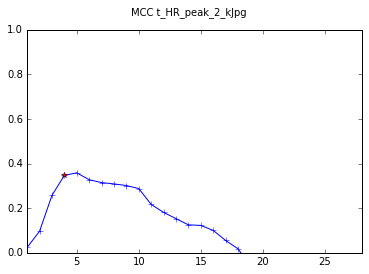

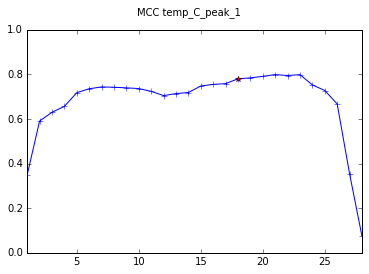

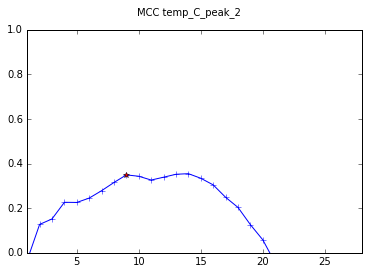

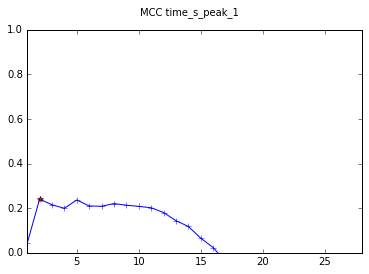

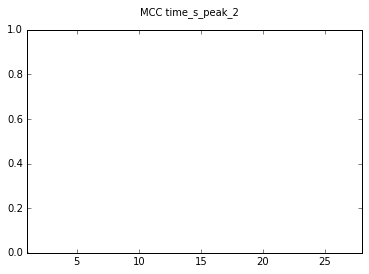

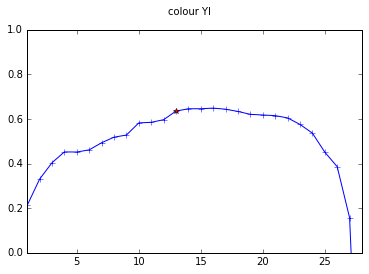

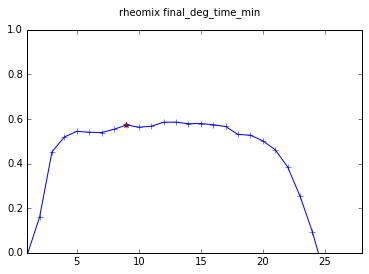

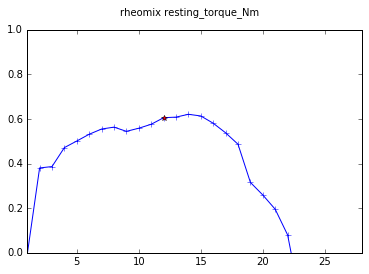

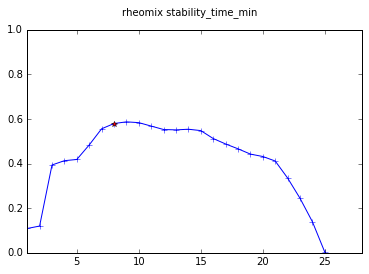

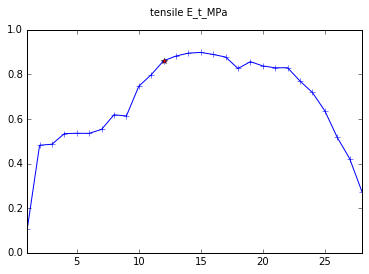

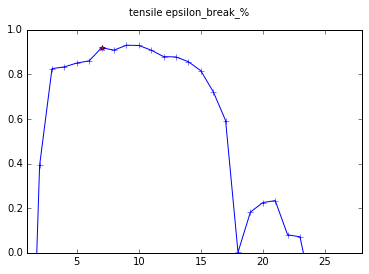

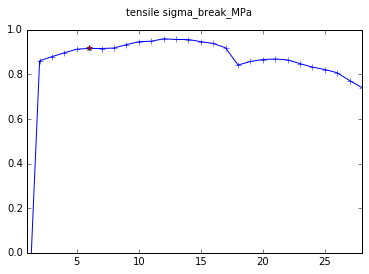

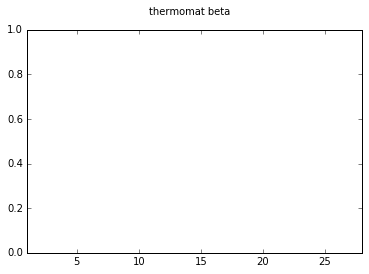

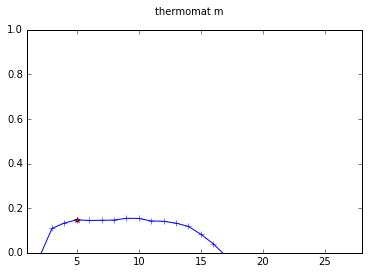

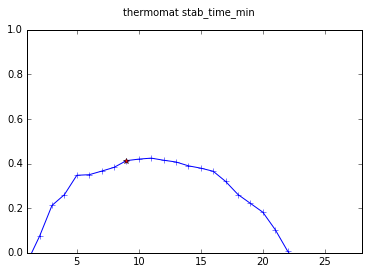

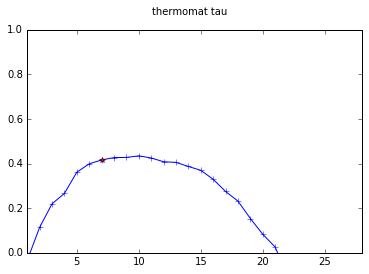

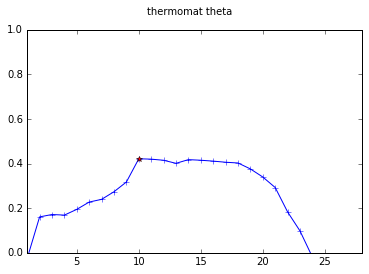

In [17]:
Q = Query()

for i in names:
    equip, d_type = i.split(' ')
    
    top_db = access_db('Top_score_results_'+ equip + '_' + d_type, False)
               
    df = DataFrame(top_db.all())
    
    n_terms = list(df['n_terms'].values)
    scores = list(df['top_score'].values)
    mcodes = list(df['top_mcode'].values)
    
    max_score = max(scores)
    done = False
    
    lim = max_score - (abs(max_score*5/105))
    
    for s in scores:
        if s > lim and done == False:
            select_score = s
            done = True
            
    ind = scores.index(select_score)
    top_score_model = mcodes[ind]
    
    t_mc = translate_model_code(top_score_model)
    
    fig = figure()
    plot(n_terms, scores, '-+')
    ylim([0.0, 1.0])
    xlim([1.0, 28.0])
    
    plot(n_terms[ind], scores[ind], 'r*')
    
    fig.suptitle(i)
    
#     fig.suptitle('Best Model: (' + t_mc + ') for ' + i)
